In [82]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

from pmdarima import auto_arima

In [84]:
df = pd.read_csv('/content/drive/MyDrive/Predictive-Analysis-on-Healthcare-Products-Data/cleaned_data.csv')

In [85]:
df.head()

,Date,ActualQuantity,Channel,Customer Country,Customer Desc,Customer Region,Geo Latitude,Geo Longitude,Location,Location Region,Location Type,Product Desc,Material Type,Product Group,Brand ID,Base UOM,Base UOM Desc.
0,2016-01-01,840,US,United States,United States Sales,AMERICAS,37.0902,-95.7129,United States Location,AMERICAS,Plant,SUR-FIT/ACTIVE LIFE TAIL CLSR (1X10PK),Finished,OSTOMY,OTHER ACCESSORIES,EA,Each
1,2016-01-01,1800,TH,Thailand,Thailand Sales,APAC,15.8700,100.9925,Thailand Location,APAC,Plant,SUR-FIT/ACTIVE LIFE TAIL CLSR (1X10PK),Finished,OSTOMY,OTHER ACCESSORIES,EA,Each
2,2016-02-01,900,US,United States,United States Sales,AMERICAS,37.0902,-95.7129,United States Location,AMERICAS,Plant,SUR-FIT/ACTIVE LIFE TAIL CLSR (1X10PK),Finished,OSTOMY,OTHER ACCESSORIES,EA,Each
3,2016-01-01,957,CA,Canada,Canada Sales,AMERICAS,56.1304,-106.3468,Canada Location,AMERICAS,Plant,SUR-FIT/ACTIVE LIFE TAIL CLSR (1X10PK),Finished,OSTOMY,OTHER ACCESSORIES,EA,Each
4,2017-01-01,1099,CA,Canada,Canada Sales,AMERICAS,56.1304,-106.3468,Canada Location,AMERICAS,Plant,SURFIT NATURA WFR FLEX 70MM (1X10PK),Finished,OSTOMY,NATURA,EA,Each


In [86]:
df.tail()

,Date,ActualQuantity,Channel,Customer Country,Customer Desc,Customer Region,Geo Latitude,Geo Longitude,Location,Location Region,Location Type,Product Desc,Material Type,Product Group,Brand ID,Base UOM,Base UOM Desc.
370,2019-08-01,968,CA,Canada,Canada Sales,AMERICAS,56.1304,-106.3468,Canada Location,AMERICAS,Plant,SUR-FIT/ACTIVE LIFE TAIL CLSR (1X10PK),Finished,OSTOMY,OTHER ACCESSORIES,EA,Each
371,2019-09-01,1088,CA,Canada,Canada Sales,AMERICAS,56.1304,-106.3468,Canada Location,AMERICAS,Plant,SUR-FIT/ACTIVE LIFE TAIL CLSR (1X10PK),Finished,OSTOMY,OTHER ACCESSORIES,EA,Each
372,2019-07-01,999,FR,France,France Sales,EMEA,46.2276,2.2137,France Location,EMEA,Plant,ESTEEM SYN+FLX WHT32/35MM PRECUT(1X10),Finished,OSTOMY,ESTEEM SYNERGY,EA,Each
373,2019-08-01,1045,FR,France,France Sales,EMEA,46.2276,2.2137,France Location,EMEA,Plant,ESTEEM SYN+FLX WHT32/35MM PRECUT(1X10),Finished,OSTOMY,ESTEEM SYNERGY,EA,Each
374,2019-09-01,1125,FR,France,France Sales,EMEA,46.2276,2.2137,France Location,EMEA,Plant,ESTEEM SYN+FLX WHT32/35MM PRECUT(1X10),Finished,OSTOMY,ESTEEM SYNERGY,EA,Each


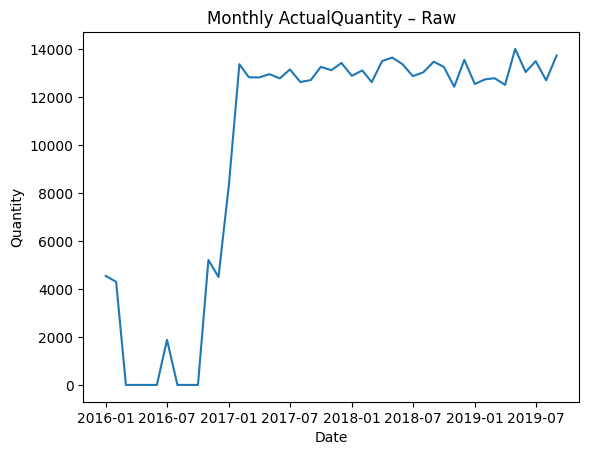

In [87]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
series = df['ActualQuantity'].resample('MS').sum()

plt.figure()
plt.plot(series)
plt.title("Monthly ActualQuantity – Raw")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.show()


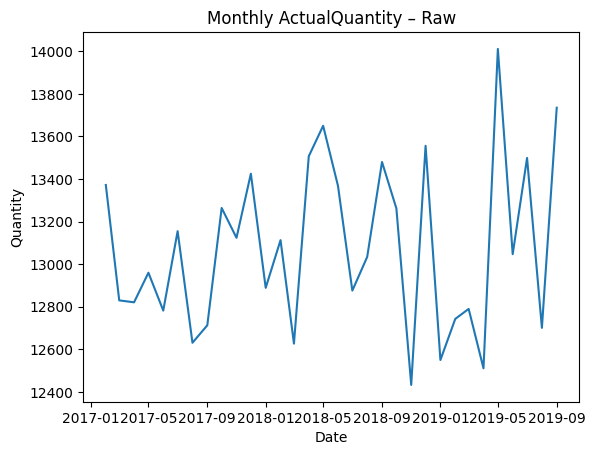

In [88]:
series = series[series.index >= '2017-01-02']

plt.figure()
plt.plot(series)
plt.title("Monthly ActualQuantity – Raw")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.show()



In [89]:
auto_model = auto_arima(
    series,
    seasonal=False,
    trace=True,
    error_action='ignore',
    stepwise=True
)

print(auto_model.summary())
print(auto_model.order)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=699.471, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=490.646, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=491.671, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=491.887, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=479.714, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=478.047, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=477.171, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=477.819, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.068 seconds
                               SARIMAX Results         

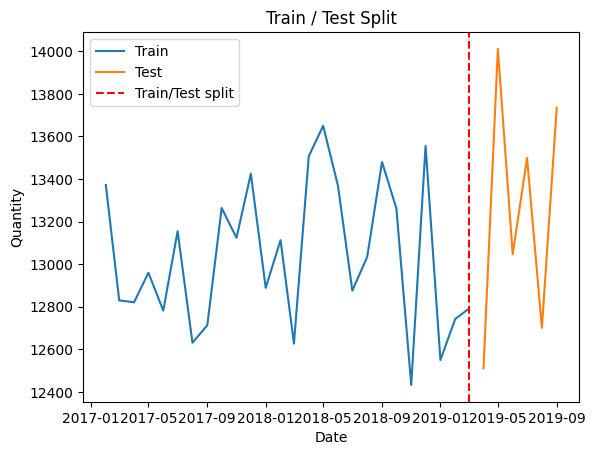

                               SARIMAX Results                                
Dep. Variable:         ActualQuantity   No. Observations:                   26
Model:                          ARIMA   Log Likelihood                -188.245
Date:                Tue, 25 Nov 2025   AIC                            380.490
Time:                        05:27:00   BIC                            383.006
Sample:                    02-01-2017   HQIC                           381.214
                         - 03-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.304e+04     67.001    194.575      0.000    1.29e+04    1.32e+04
sigma2      1.141e+05   4.86e+04      2.350      0.019    1.89e+04    2.09e+05
Ljung-Box (L1) (Q):                   0.13   Jarque-

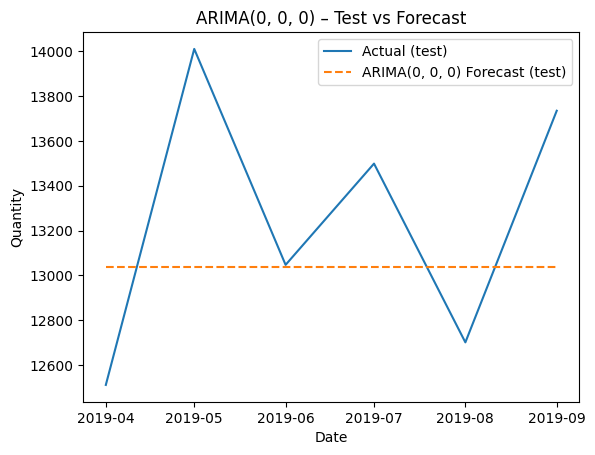

In [93]:
train = series[:-6]
test  = series[-6:]

plt.figure()
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.axvline(train.index[-1], color='red', linestyle='--', label='Train/Test split')
plt.title("Train / Test Split")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.show()

arima_model = ARIMA(train, order=auto_model.order)
arima_fit = arima_model.fit()

print(arima_fit.summary())


test_forecast = arima_fit.forecast(steps=6)

mae = mean_absolute_error(test, test_forecast)
rmse = np.sqrt(mean_squared_error(test, test_forecast))
mape = np.mean(np.abs((test - test_forecast) / test)) * 100
print(f"\nTest MAE:  {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAPE: {mape:.2f}%")

plt.figure()
plt.plot(test.index, test, label='Actual (test)')
plt.plot(test_forecast.index, test_forecast, label=f'ARIMA{auto_model.order} Forecast (test)', linestyle='--')
plt.title(f"ARIMA{auto_model.order} – Test vs Forecast")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.show()


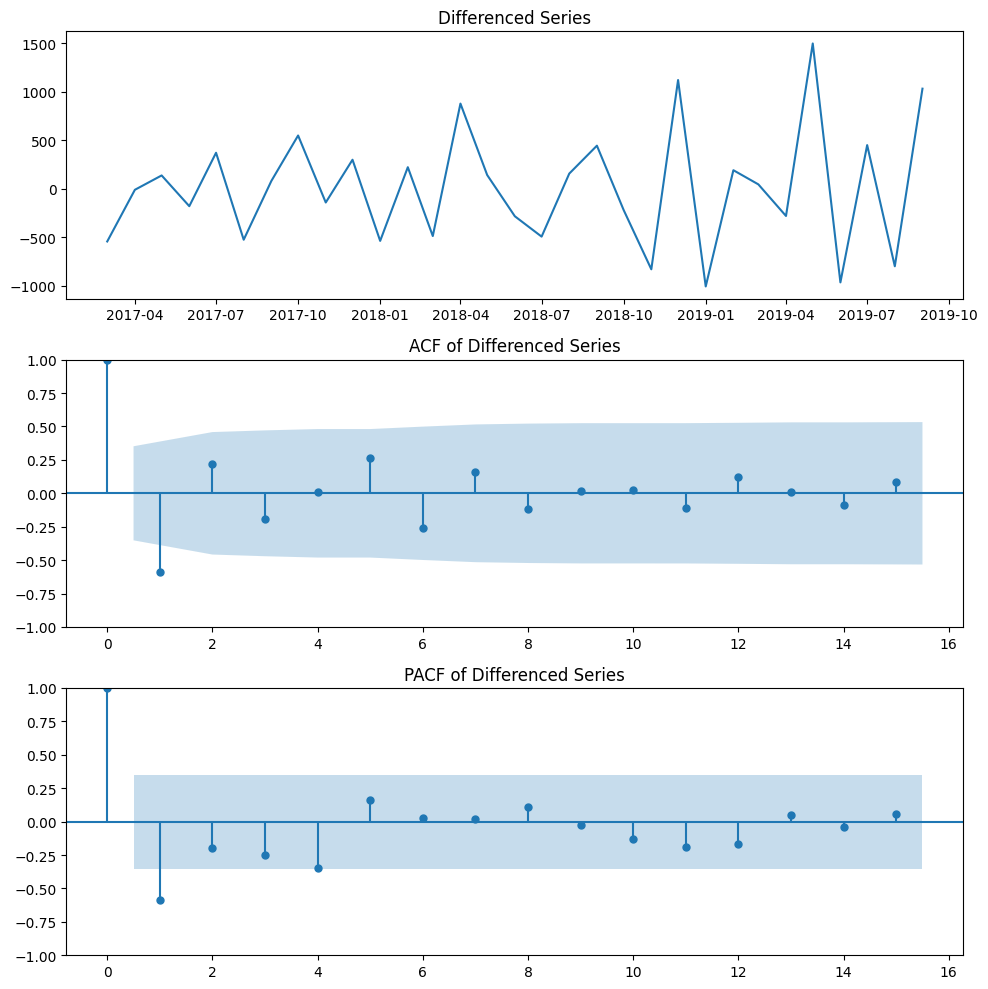

In [91]:
diff_series = series.diff().dropna()

fig, axes = plt.subplots(3, 1, figsize=(10, 10))

axes[0].plot(diff_series)
axes[0].set_title('Differenced Series')

plot_acf(diff_series, ax=axes[1])
axes[1].set_title('ACF of Differenced Series')

plot_pacf(diff_series, ax=axes[2])
axes[2].set_title('PACF of Differenced Series')

plt.tight_layout()
plt.show()



=== Final ARIMA(0, 0, 0) on full series_model ===


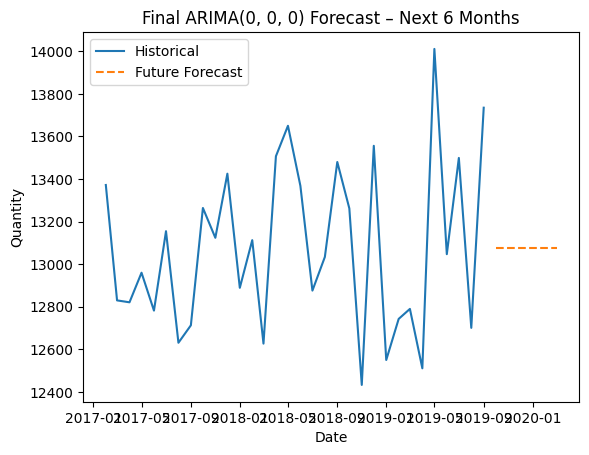


Future 6-month forecast:
2019-10-01    13076.843369
2019-11-01    13076.843369
2019-12-01    13076.843369
2020-01-01    13076.843369
2020-02-01    13076.843369
2020-03-01    13076.843369
Freq: MS, Name: predicted_mean, dtype: float64


In [92]:
print(f"\n=== Final ARIMA{auto_model.order} on full series_model ===")

final_model = ARIMA(series, order=auto_model.order)
final_fit = final_model.fit()

future_steps = 6   # forecast next 6 months
future_forecast = final_fit.forecast(steps=future_steps)

plt.figure()
plt.plot(series, label='Historical')
plt.plot(future_forecast.index, future_forecast, label='Future Forecast', linestyle='--')
plt.title(f"Final ARIMA{auto_model.order} Forecast – Next {future_steps} Months")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.show()

print("\nFuture 6-month forecast:")
print(future_forecast)
